In [1]:
### Some initializations
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import warnings
import itertools
from Main_full import main
from heapq import nlargest
from sklearn.cluster import KMeans

In [8]:
def main_gauss(x,y,B,l):
    E=len(x)
    alpha=0.1
    n,d=x[0].shape
    temp=[list(itertools.combinations(range(d), k)) for k in range(0,d)]
    subsets = [item for sublist in temp for item in sublist]
    dic={}
    S_ini=[]
    for ind in subsets:
        ind=np.array(ind)
        Res=np.zeros(E)
        T_mc=np.zeros((E,B))
        for i in range(E):
            n,d=x[i].shape
            if len(ind)==0:
                Res[i]=np.sum((y[i]-np.mean(y[i]))**2)
            else:
                xtemp=copy.copy(x[i][:,ind])
                xtemp=np.concatenate((xtemp,np.ones((n,1))),axis=1)
                beta_hat=np.linalg.inv(xtemp.T@xtemp)@(xtemp.T)@y[i]
                Res[i]=np.sum((y[i]-xtemp@beta_hat)**2)

                T_mc[i,:]=(np.random.chisquare(n-len(ind)-1,B))
        T_b=np.sort(T_mc,kind='mergesort',axis=0)
        T_data=np.sort(Res,kind='mergesort')
        pval=1/B*np.sum(np.sum(T_data[:l])*np.sum(T_b[-l:,:],axis=0)>np.sum(T_b[:l,:],axis=0)*np.sum(T_data[-l:]))
        if pval>0.1:
            S_ini.append(ind)
    return [set(S_ini[k]) for k in range(len(S_ini))]

Signal strength 1 of 7
Signal strength 2 of 7
Signal strength 3 of 7
Signal strength 4 of 7
Signal strength 5 of 7
Signal strength 6 of 7
Signal strength 7 of 7


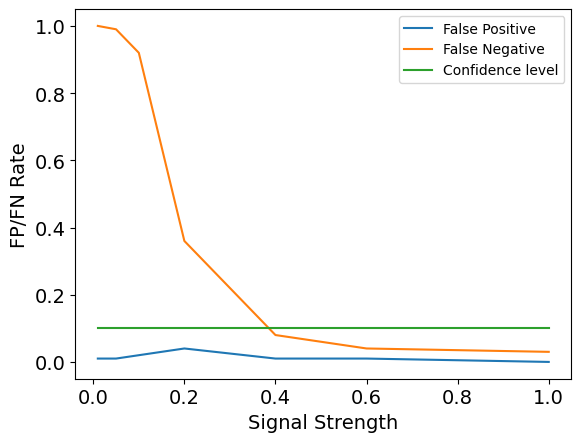

In [9]:
### First test, increasing signal strength
np.random.seed(0)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
signal=[0.01,0.05,0.1,0.2,0.4,0.6,1]
fn=np.zeros((len(signal)))
fp=np.zeros((len(signal)))
runs=100
n=10 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,sig in enumerate(signal):
    print('Signal strength',o+1,'of',len(signal))
    for r in range(runs):
        for i in range(I):
            e=np.random.multivariate_normal(0*np.ones(n),1*np.eye(n))
            Y[r][i]=X[r][i]@(sig*betas[i,:])+e


        plausibleS=main_gauss(X[r],Y[r],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(signal,fp,label='False Positive')
plt.plot(signal,fn,label='False Negative')
plt.plot(signal,0.1*np.ones((len(signal))),label='Confidence level')
plt.xlabel('Signal Strength',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
# plt.savefig('Signalchange.eps', format='eps')

Signal strength 1 of 5
Signal strength 2 of 5
Signal strength 3 of 5
Signal strength 4 of 5
Signal strength 5 of 5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


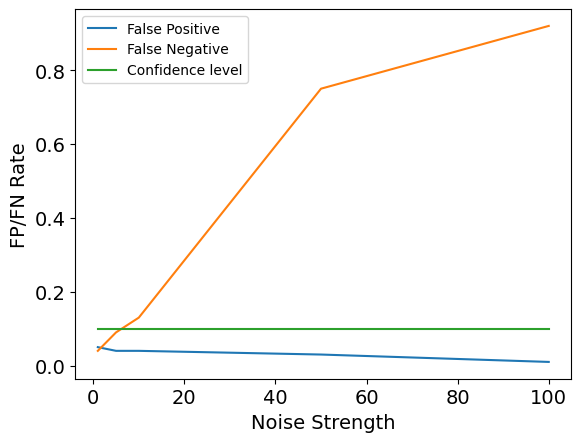

In [10]:
### Second, increasing noise strength
np.random.seed(0)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
noise=[1,5,10,50,100]
fn=np.zeros((len(noise)))
fp=np.zeros((len(noise)))
runs=100
n=10 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,nos in enumerate(noise):
    print('Signal strength',o+1,'of',len(noise))
    for r in range(runs):
        for i in range(I):
            e=np.random.multivariate_normal(0*np.ones(n),(nos)*np.eye(n))
            Y[r][i]=X[r][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r],Y[r],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(noise,fp,label='False Positive')
plt.plot(noise,fn,label='False Negative')
plt.plot(noise,0.1*np.ones((len(noise))),label='Confidence level')
plt.xlabel('Noise Strength',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Noisechange.eps', format='eps')

Sample size 1 of 6
Sample size 2 of 6
Sample size 3 of 6
Sample size 4 of 6
Sample size 5 of 6
Sample size 6 of 6


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


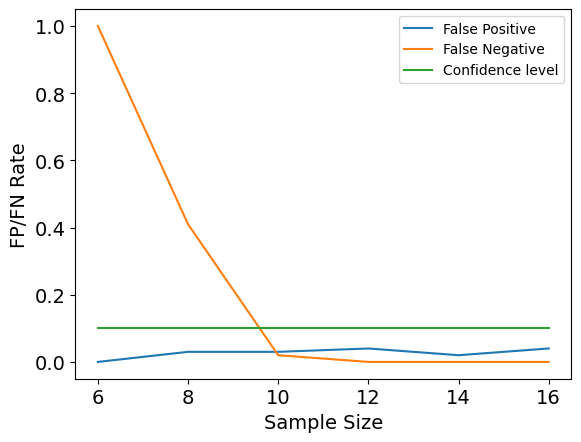

In [11]:
### Changing sample size
np.random.seed(0)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
sample=[6,8,10,12,14,16]
fn=np.zeros((len(sample)))
fp=np.zeros((len(sample)))
runs=100
n=sample[-1] # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=50      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for o,n1 in enumerate(sample):
        X[r].append([])
        Y[r].append([])
        for i in range(I):
            x=np.zeros((n,d))
            y=np.zeros((n))
            a=np.random.uniform(low=1,high=5,size=(d))
            for p in range(d):
                x[:,p]=np.random.normal(scale=a[p],size=(n))
            betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
            X[r][o].append(x[:n1])
            Y[r][o].append(y[:n1])


for o,n1 in enumerate(sample):
    print('Sample size',o+1,'of',len(sample))
    for r in range(runs):
        
        for i in range(I):
            e=np.random.multivariate_normal(0*np.ones(n1),1*np.eye(n1))
            Y[r][o][i]=X[r][o][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r][o],Y[r][o],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(sample,fp,label='False Positive')
plt.plot(sample,fn,label='False Negative')
plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level')
plt.xlabel('Sample Size',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Samplechange.eps', format='eps')

Environments 1 of 7
Environments 2 of 7
Environments 3 of 7
Environments 4 of 7
Environments 5 of 7
Environments 6 of 7
Environments 7 of 7


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


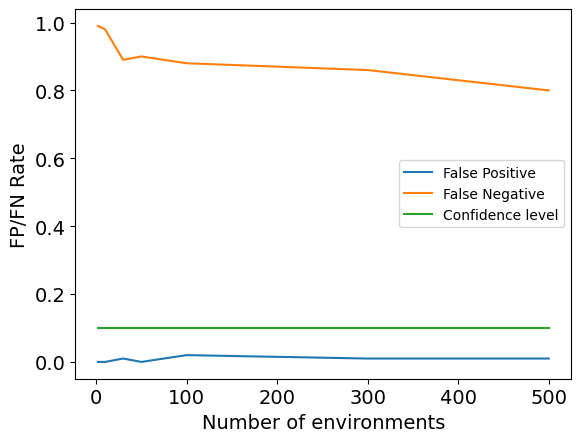

In [19]:
### Changing number of environments
np.random.seed(1)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
environments=[2,10,30,50,100,300,500]
fn=np.zeros((len(environments)))
fp=np.zeros((len(environments)))
runs=100
n=7 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=environments[-1]      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,es in enumerate(environments):
    print('Environments',o+1,'of',len(environments))
    for r in range(runs):
        for i in range(es):
            e=np.random.multivariate_normal(0*np.ones(n),(1)*np.eye(n))
            Y[r][i]=X[r][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r][:es],Y[r][:es],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(environments,fp,label='False Positive')
plt.plot(environments,fn,label='False Negative')
plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level')
plt.xlabel('Number of environments',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Environmentchangen=7.eps', format='eps')

Environments 1 of 7
Environments 2 of 7
Environments 3 of 7
Environments 4 of 7
Environments 5 of 7
Environments 6 of 7
Environments 7 of 7


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


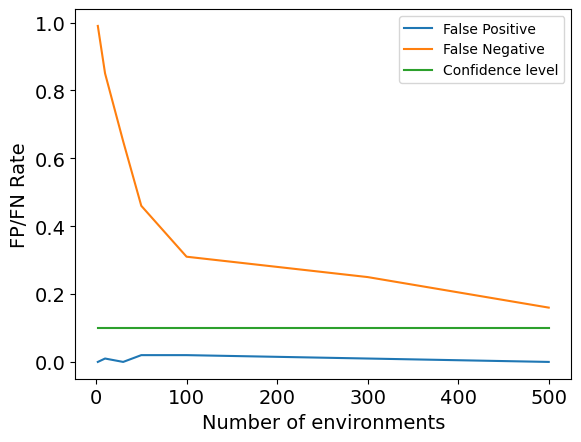

In [18]:
### Changing number of environments
np.random.seed(1)
d=5  #Dimensionality
supp=(0,1) #support indices
s=len(supp)  #Number of support entries
environments=[2,10,30,50,100,300,500]
fn=np.zeros((len(environments)))
fp=np.zeros((len(environments)))
runs=100
n=8 # Sample size
l=1 # Number of intervals we combine for the statistics
B=100 # Bootstrap runs
I=environments[-1]      #Number of Intervals 
a=[list(itertools.combinations(range(d), k)) for k in range(0,d+1)]
subsets = [item for sublist in a for item in sublist]
dic={}
# We first fix the data for all runs, to eliminate the randomness of this.
X=[]
Y=[]
for r in range(runs):
    betas=np.zeros((I,d))
    X.append([])
    Y.append([])
    for i in range(I):
        x=np.zeros((n,d))
        y=np.zeros((n))
        a=np.random.uniform(low=1,high=5,size=(d))
        for p in range(d):
            x[:,p]=np.random.normal(scale=a[p],size=(n))
        
        betas[i,:s]=np.random.uniform(low=1,high=5,size=(s))
        X[r].append(x)
        Y[r].append(y)


for o,es in enumerate(environments):
    print('Environments',o+1,'of',len(environments))
    for r in range(runs):
        for i in range(es):
            e=np.random.multivariate_normal(0*np.ones(n),(1)*np.eye(n))
            Y[r][i]=X[r][i]@(betas[i,:])+e


        plausibleS=main_gauss(X[r][:es],Y[r][:es],B,l)
        if not not plausibleS:
            supphat=set.intersection(*plausibleS)
            if len(supphat.difference(set(supp)))>0:
                fp[o]+=1
            if len(set(supp).difference(supphat))>0:
                fn[o]+=1
fp=fp/runs
fn=fn/runs
fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.plot(environments,fp,label='False Positive')
plt.plot(environments,fn,label='False Negative')
plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level')
plt.xlabel('Number of environments',fontsize=14)
plt.ylabel('FP/FN Rate',fontsize=14)
plt.legend()
plt.savefig('Environmentchangen=8.eps', format='eps')

In [17]:
def shuffle(x,B):
    E=len(x)
    x_shuffle=[]
    for e in range(E):
        n,d=x[e].shape
        x_temp=np.zeros((B,n,d))
        for b in range(B):
            for i in range(d):
                c=(x[e][:,i].T).flatten()
                np.random.shuffle(c)
                x_temp[b,:,i]=c
        x_shuffle.append(x_temp)
        
    return x_shuffle
    

In [128]:
def main_noassumption(x,y,B,l):
    S1=[0,1,2,3,4]
    E=len(x)
    lam=0
    n,d=x[0].shape
    temp=[list(itertools.combinations(range(d), k)) for k in range(0,d)]
    subsets = [item for sublist in temp for item in sublist]
    dic={}
    S_ini=[]
    x_shuffle=shuffle(x,B)
    for ind in subsets:
        Res=np.zeros((E,B))
        T_mc=np.zeros((E,B))
        for i in range(E):
            n,d=x[i].shape
            if len(ind)==0:
#                 Res[i]=np.sum((y[i]-np.mean(y[i]))**2)
                Res[i]=np.sum((y[i])**2)
            else:
                comp=list(set(S1)-set(ind))
                xtemp=copy.copy(x[i])
                for b in range(B):
                    xtemp[:,comp]=(x_shuffle[i][b,:,comp]).T
                    beta_hat=np.linalg.inv(xtemp.T@xtemp+lam*np.eye(d))@(xtemp.T)@y[i]
                    Res[i,b]=np.sum((y[i]-xtemp@beta_hat)**2)
#         T_data=np.var(Res,axis=0)
        T_data=100*np.min(Res,axis=0)/np.max(Res,axis=0)
        print(ind)
        print(np.median(T_data),np.mean(T_data),np.std(T_data))
#         if something:
#             S_ini.append(ind)
    return [set(S_ini[k]) for k in range(len(S_ini))]